In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import os.path as osp
import data.imgs as img_data
import data as data
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [24]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
train_label_path = osp.join(osp.dirname(img_data.__file__), "train_agbm")
# data_path = osp.join(osp.dirname(data), "imgs")

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [4]:
train_abgm_datagen = ImageDataGenerator()
train_abgm_data = train_abgm_datagen.flow_from_directory(directory=data_path, classes=["train_agbm"], batch_size=32, color_mode="grayscale")

Found 8689 images belonging to 1 classes.


In [5]:
print(train_abgm_data)

In [6]:
imgs = next(train_abgm_data)
imgs[0].shape

(32, 256, 256, 1)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

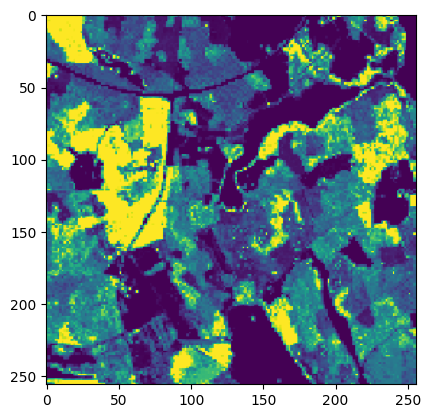

In [8]:
plt.imshow(imgs[0][0])

In [9]:
train_features_datagen = ImageDataGenerator()
train_features_data = train_features_datagen.flow_from_directory(directory=data_path, classes=["train_features"], batch_size=32, color_mode="grayscale")

Found 189078 images belonging to 1 classes.


In [10]:
train_features_data

In [11]:
from osgeo import gdal